In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

np.random.seed(42)
sns.set_style('whitegrid')
sns.set_palette('muted')

In [2]:
train_df = pd.read_csv('data/train/train.csv', delimiter=',');
test_df = pd.read_csv('data/test/test.csv', delimiter=',');

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

In [8]:
train_df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000
mean,37227.118729,38.565875,15.753901,7302.397983,0.832578,50.007651,1.648075,55.758415
std,21519.150028,12.079673,11.245981,2151.457423,0.994991,28.466459,1.555689,25.411090
min,1.000000,18.000000,1.000000,1316.000000,0.000000,1.000000,0.000000,2.000000
25%,18580.250000,28.000000,7.000000,5658.000000,0.000000,25.000000,0.000000,36.000000
50%,37209.500000,39.000000,13.000000,7354.000000,1.000000,50.000000,1.000000,56.000000
75%,55876.750000,49.000000,23.000000,8880.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


## Zmienne
__Employee ID__: Unikalny identyfikator przypisany do każdego pracownika. \
__Age__: Wiek pracownika, w zakresie od 18 do 60 lat. \
__Gender__: Płeć pracownika. \
__Years at Company__: Liczba lat, które pracownik przepracował w firmie. \
__Monthly Income__: Miesięczna pensja pracownika, w dolara
__Overtime__: Czy pracuje po godzinach (Tak lub Nie). \
__Number of Dependents__: Ilość członków rodziny (Żona/Mąż/Dzeci itp). \ch. \
__Job Role__: Dział lub rola, w której pracownik pracuje, zakodowana w kategorie takie jak Finanse, Opieka Zdrowotna, Technologia, Edukacja i Media. \
__Work-Life Balance__: Postrzegana przez pracownika równowaga między pracą a życiem prywatnym (Słaba, Poniżej Średniej, Dobra, Doskonała). \
__Job Satisfaction__: Zadowolenie pracownika z pracy: (Bardzo Niskie, Niskie, Średnie, Wysokie). \
__Performance Rating__: Ocena wydajności pracownika: (Niska, Poniżej Średniej, Średnia, Wysoka). \
__Number of Promotions__: Łączna liczba awansów, które otrzymał pracownik. \
__Distance from Home__: Odległość między domem a miejscem pracy pracownika, w milach. \
__Education Level__: Najwyższy poziom wykształcenia osiągnięty przez pracownika: (Liceum, Dyplom Associate, Licencjat, Magisterium, Doktorat). \
__Marital Status__: Stan cywilny pracownika: (Rozwiedziony, Żonaty, Singiel). \
__Job Level__: Poziom stanowiska pracownika: (Początkujący, Średni, Starszy). \
__Company Size__: Wielkość firmy, w której pracuje pracownik: (Mała, Średnia, Duża). \
__Company Tenure__: Łączna liczba lat, które pracownik przepracował w branży. \
__Remote Work__: Czy pracownik pracuje zdalnie: (Tak lub Nie). \
__Leadership Opportunities__: Czy pracownik ma możliwości przywódcze: (Tak lub Nie). \
__Innovation Opportunities__: Czy pracownik ma możliwości innowacji: (Tak lub Nie). \
__Company Reputation__: Postrzeganie reputacji firmy przez pracownika: (Bardzo Zła, Zła, Dobra, Doskonała). \
__Employee Recognition__: Poziom uznania, jaki otrzymuje pracownik: (Bardzo Niski, Nii, Średni, Wysoki). \

__Attrition__: Czy pracownik opuścił firmę, zakodowane jako 0 (pozostał) i 1 (opuścił).

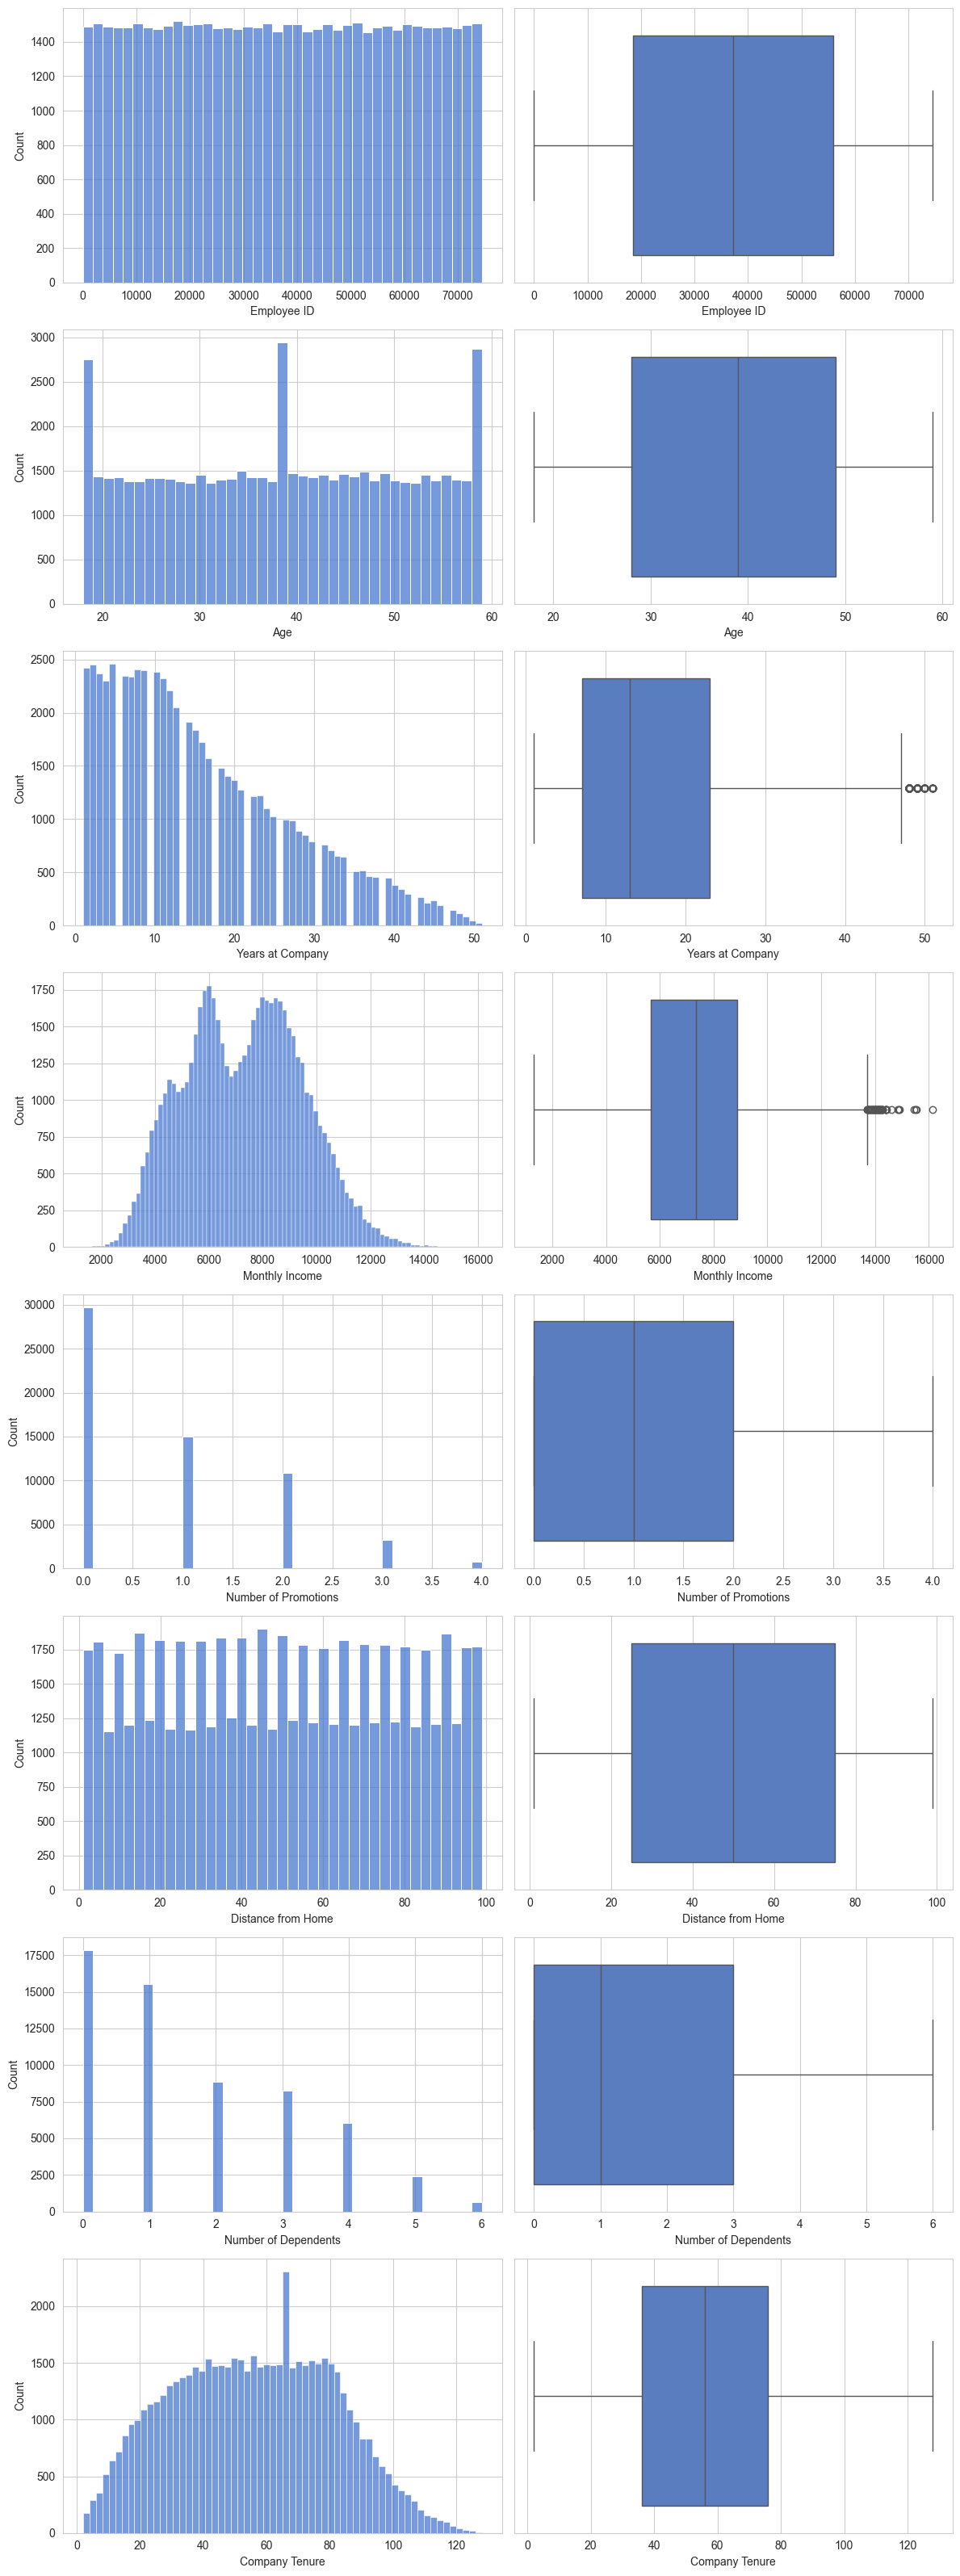

In [10]:
def plot_hist_and_box(df):
    # Filter only numeric columns
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(12, 4 * len(numeric_cols)))
    
    for i, col in enumerate(numeric_cols):
        # Plot histogram and boxplot
        sns.histplot(df[col], kde=False, ax=axes[i, 0])
        sns.boxplot(x=df[col], ax=axes[i, 1])
    
    plt.tight_layout()
    plt.show()

plot_hist_and_box(train_df)

## Zmienne
__Employee ID__: Unikalny identyfikator przypisany do każdego pracownika. \
__Age__: Wiek pracownika, w zakresie od 18 do 60 lat. \
__Gender__: Płeć pracownika. \
__Years at Company__: Liczba lat, które pracownik przepracował w firmie. \
__Monthly Income__: Miesięczna pensja pracownika, w dolarach. \
__Overtime__: Czy pracuje po godzinach (Tak lub Nie). \
__Number of Dependents__: Ilość członków rodziny (Żona/Mąż/Dzeci itp). \
__Job Role__: Dział lub rola, w której pracownik pracuje, zakodowana w kategorie takie jak Finanse, Opieka Zdrowotna, Technologia, Edukacja i Media. \
__Work-Life Balance__: Postrzegana przez pracownika równowaga między pracą a życiem prywatnym (Słaba, Poniżej Średniej, Dobra, Doskonała). \
__Job Satisfaction__: Zadowolenie pracownika z pracy: (Bardzo Niskie, Niskie, Średnie, Wysokie). \
__Performance Rating__: Ocena wydajności pracownika: (Niska, Poniżej Średniej, Średnia, Wysoka). \
__Number of Promotions__: Łączna liczba awansów, które otrzymał pracownik. \
__Distance from Home__: Odległość między domem a miejscem pracy pracownika, w milach. \
__Education Level__: Najwyższy poziom wykształcenia osiągnięty przez pracownika: (Liceum, Dyplom Associate, Licencjat, Magisterium, Doktorat). \
__Marital Status__: Stan cywilny pracownika: (Rozwiedziony, Żonaty, Singiel). \
__Job Level__: Poziom stanowiska pracownika: (Początkujący, Średni, Starszy). \
__Company Size__: Wielkość firmy, w której pracuje pracownik: (Mała, Średnia, Duża). \
__Company Tenure__: Łączna liczba lat, które pracownik przepracował w branży. \
__Remote Work__: Czy pracownik pracuje zdalnie: (Tak lub Nie). \
__Leadership Opportunities__: Czy pracownik ma możliwości przywódcze: (Tak lub Nie). \
__Innovation Opportunities__: Czy pracownik ma możliwości innowacji: (Tak lub Nie). \
__Company Reputation__: Postrzeganie reputacji firmy przez pracownika: (Bardzo Zła, Zła, Dobra, Doskonała). \
__Employee Recognition__: Poziom uznania, jaki otrzymuje pracownik: (Bardzo Niski, Nii, Średni, Wysoki). \

__Attrition__: Czy pracownik opuścił firmę, zakodowane jako 0 (pozostał) i 1 (opuścił).

In [31]:
def process_data(train_df, test_df):
    cols_to_drop = ['Employee ID', 'Attrition']
    cols_to_scale = [
        'Age', 'Years at Company',
        'Monthly Income', 'Number of Promotions',
        'Distance from Home', 'Company Tenure', 'Number of Dependents'
    ]
    cols_to_en_oh = [
        'Job Role', 'Work-Life Balance',
        'Job Satisfaction', 'Performance Rating',
        'Marital Status', 'Education Level',
        'Job Level', 'Company Size', 'Company Reputation',
        'Employee Recognition'
    ]
    cols_to_en_ord = [
        'Remote Work', 'Overtime',
        'Leadership Opportunities',
        'Innovation Opportunities'
    ]
    scaler = StandardScaler()
    encoder = OneHotEncoder(handle_unknown='ignore')

    # ---- TRAIN DATA ---- #

    # Remove unusable columns
    X_train = train_df.drop(columns=cols_to_drop)

    # Scale numeric columns
    X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

    # One hot encoding of selected categories
    encoded_array = encoder.fit_transform(X_train[cols_to_en_oh]).toarray()
    encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(cols_to_en_oh))
    X_train = pd.concat([X_train.drop(columns=cols_to_en_oh), encoded_df], axis=1)

    # Oridnal encoding 
    X_train['Gender'] = X_train['Gender'].map({'Male': 0, 'Female': 1})
    X_train[cols_to_en_ord] = X_train[cols_to_en_ord].apply(lambda col: col.map({'No': 0, 'Yes': 1}))

    # Target variable
    y_train = train_df['Attrition']

    # ---- TEST DATA ---- #

    # Remove unusable columns
    X_test = test_df.drop(columns=cols_to_drop)

    # Scale numeric columns
    X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

    # One hot encoding of selected categories
    encoded_array = encoder.transform(X_test[cols_to_en_oh]).toarray()
    encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(cols_to_en_oh))
    X_test = pd.concat([X_test.drop(columns=cols_to_en_oh), encoded_df], axis=1)

    # Oridnal encoding 
    X_test['Gender'] = X_test['Gender'].map({'Male': 0, 'Female': 1})
    X_test[cols_to_en_ord] = X_test[cols_to_en_ord].apply(lambda col: col.map({'No': 0, 'Yes': 1}))

    # Target variable
    y_test = test_df['Attrition']

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = process_data(train_df, test_df)
print(X_train.shape)
print(X_test.shape)

(59598, 51)
(14900, 51)
0.25000838954327326


In [6]:
train_df[[
        'Remote Work',
        'Leadership Opportunities',
        'Innovation Opportunities'
    ]]

,Remote Work,Leadership Opportunities,Innovation Opportunities
0,No,No,No
1,No,No,No
2,No,No,No
3,Yes,No,No
4,No,No,No
...,...,...,...
59593,No,No,Yes
59594,No,No,No
59595,No,Yes,No
59596,No,No,No


In [41]:
def preprocess(train_df, test_df):
    X_train = train_df.drop(columns=['Employee ID', 'Attrition'])
    y_train = train_df['Attrition']
    
    X_test = test_df.drop(columns=['Employee ID', 'Attrition'])
    y_test = test_df['Attrition']
    
    numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X_train.select_dtypes(include=['object', 'category']).columns
    
    numerical_transformer = StandardScaler()  # Normalize numerical data
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')  # One-Hot Encode categorical data, try LabelEncoder

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),   # Scale numeric features
            ('cat', categorical_transformer, categorical_features)  # Encode categorical features
        ]
    )
    return X_train, y_train, X_test, y_test, preprocessor
    

X_train, y_train, X_test, y_test, preprocessor = preprocess(train_df, test_df)
classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Step 1: Scale + Encode
    ('classifier', classifier)  # Step 2: Classifier
])

model_pipeline.fit(X_train, y_train)

# 3️⃣ Make predictions on test data
y_pred = model_pipeline.predict(X_test)

# 4️⃣ Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

        Left       0.73      0.73      0.73      7032
      Stayed       0.76      0.76      0.76      7868

    accuracy                           0.75     14900
   macro avg       0.74      0.74      0.74     14900
weighted avg       0.75      0.75      0.75     14900



(59598, 22)

                  Feature  Importance
4      Distance from Home    0.069985
2          Monthly Income    0.064965
6          Company Tenure    0.062192
1        Years at Company    0.059100
0                     Age    0.058529
35  Marital Status_Single    0.050106
38       Job Level_Senior    0.047810
5    Number of Dependents    0.038497
36        Job Level_Entry    0.037573
3    Number of Promotions    0.033108


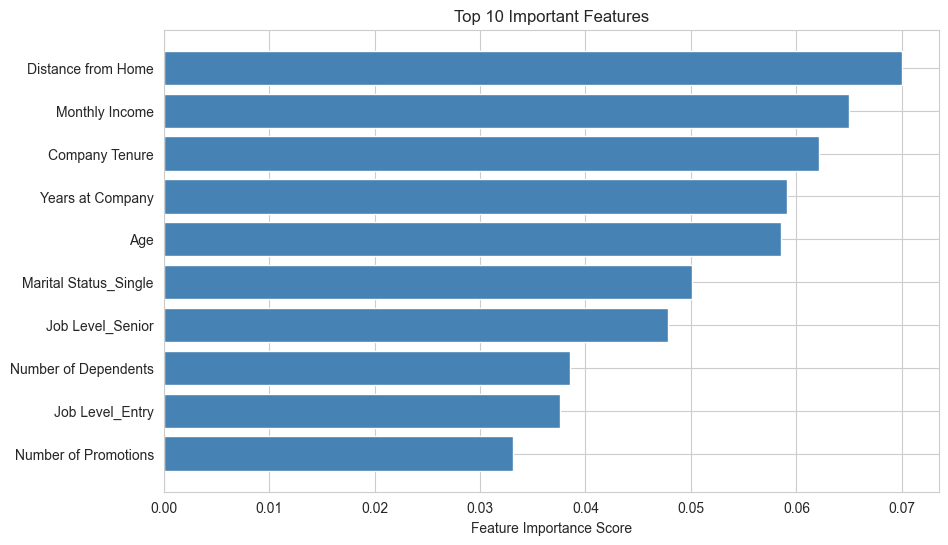

In [42]:
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Access the RandomForestClassifier from the pipeline
rf_model = model_pipeline.named_steps['classifier']

# Get feature importances
importances = rf_model.feature_importances_

# Get feature names from both numerical and encoded categorical features
# OneHotEncoder can expand categorical features into multiple binary features, so we have to extract those names
encoded_feature_names = model_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
all_feature_names = list(numerical_features) + list(encoded_feature_names)

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the most important features
print(feature_importance_df.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'].iloc[:10], feature_importance_df['Importance'].iloc[:10], color='steelblue')
plt.xlabel('Feature Importance Score')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()  # Invert y-axis to display top features at the top
plt.show()

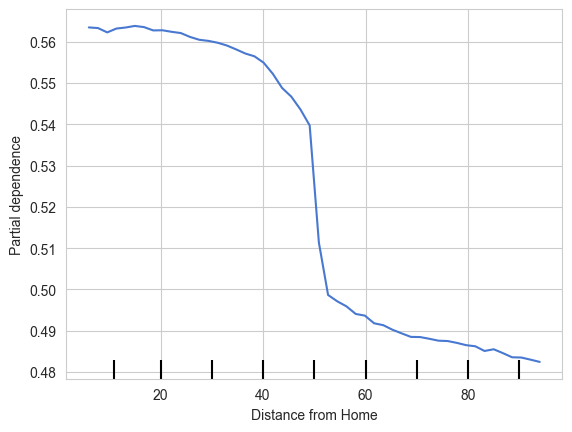

In [47]:
from sklearn.inspection import PartialDependenceDisplay

# Assuming rf_model is your trained RandomForest model
# X_train is your training data (without the target variable)

# Generate the partial dependence plot for a feature
feature_to_investigate = 'Distance from Home'  # Replace with your feature name

# Create the Partial Dependence Display
display = PartialDependenceDisplay.from_estimator(model_pipeline, 
                                                  X_train, 
                                                  features=[feature_to_investigate], 
                                                  feature_names=X_train.columns, 
                                                  grid_resolution=50)

# To show the plot (in Jupyter Notebooks, for example)
import matplotlib.pyplot as plt
plt.show()

 98%|===================| 195/200 [00:35<00:00]        

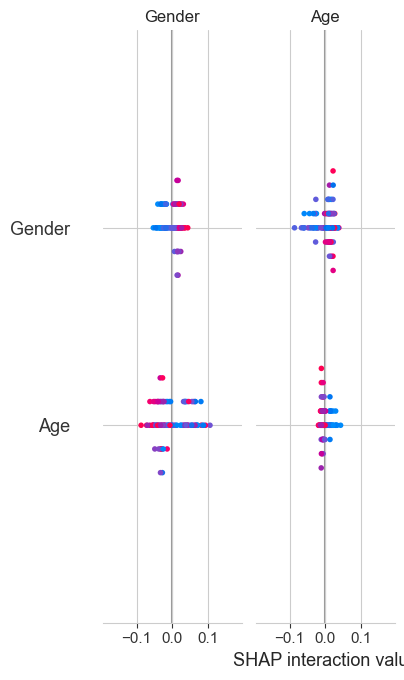

In [56]:
import shap

# Take a sample from the test set for explanation
X_sample = X_test.sample(100, random_state=42)

# Re-transform the data to what RandomForest sees
X_sample_transformed = model_pipeline.named_steps['preprocessor'].transform(X_sample)

# Initialize SHAP explainer and calculate SHAP values
explainer = shap.TreeExplainer(model_pipeline.named_steps['classifier'], X_sample_transformed)
# shap_values = explainer(X_sample_transformed)
shap_values = explainer.shap_values(X_sample_transformed, check_additivity=False)  # Disable additivity check

# Plot SHAP summary plot for a feature
shap.summary_plot(shap_values, X_sample_transformed, feature_names=X_train.columns)


In [57]:
X_sample_transformed.shape

(100, 56)